In [1]:
import tensorflow_datasets as tfds
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Embedding
import matplotlib.pyplot as plt
from keras.utils import pad_sequences

In [2]:
data = tfds.load("yelp_polarity_reviews")
trainData = data['train']
testData = data['test']
train = []
test = []
for dataPoint in data['train']:
    train.append(dataPoint)

for dataPoint in data['test']:
    test.append(dataPoint)

trainX = []
trainY = []
for dataPoint in train:
    trainX.append(dataPoint['text'].numpy().decode())
    trainY.append(int(dataPoint['label'].numpy()))

testX = []
testY = []
for dataPoint in test:
    testX.append(dataPoint['text'].numpy().decode())
    testY.append(int(dataPoint['label'].numpy()))

print(len(trainX))
print(trainX[0])

560000
The Groovy P. and I ventured to his old stomping grounds for lunch today.  The '5 and Diner' on 16th St and Colter left me with little to ask for.  Before coming here I had a preconceived notion that 5 & Diners were dirty and nasty. Not the case at all.\n\nWe walk in and let the waitress know we want to sit outside (since it's so nice and they had misters).  We get two different servers bringing us stuff (talk about service) and I ask the one waitress for recommendations.  I didn't listen to her, of course, and ordered the Southwestern Burger w/ coleslaw and started with a nice stack of rings.\n\nThe Onion Rings were perfectly cooked.  They looked like they were prepackaged, but they were very crispy and I could actually bite through the onion without pulling the entire thing out (don't you hate that?!!!)\n\nThe Southwestern Burger was order Medium Rare and was cooked accordingly.  Soft, juicy, and pink with a nice crispy browned outer layer that can only be achieved on a well u

In [3]:
vocabularySize = 20000
length = 200
tok = Tokenizer(num_words = vocabularySize)
tok.fit_on_texts(trainX)
trainTokenized = tok.texts_to_sequences(trainX)
testTokenized = tok.texts_to_sequences(testX)
trainTokenized = pad_sequences(trainTokenized, maxlen=length)
testTokenized = pad_sequences(testTokenized, maxlen=length)
trainY = np.array(trainY)
testY = np.array(testY)

In [4]:
model = Sequential([Embedding(vocabularySize, 16),
                    LSTM(32), Dense(64, activation='relu'),
                    Dense(1, activation='sigmoid')])
model.compile(loss = 'binary_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                6272      
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 328,449
Trainable params: 328,449
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(trainTokenized, trainY, epochs=3, validation_data=(testTokenized, testY))

Epoch 1/3
17500/17500 [==============================] - 806s 46ms/step - loss: 0.1952 - accuracy: 0.9240 - val_loss: 0.1538 - val_accuracy: 0.9408
Epoch 2/3
17500/17500 [==============================] - 806s 46ms/step - loss: 0.1411 - accuracy: 0.9470 - val_loss: 0.1355 - val_accuracy: 0.9498
Epoch 3/3
17500/17500 [==============================] - 811s 46ms/step - loss: 0.1256 - accuracy: 0.9535 - val_loss: 0.1251 - val_accuracy: 0.9543


In [6]:
texts = ["I woke up to the golden rays of the sun gently streaming through my window, filling my room with warmth and hope. As I stepped outside, the crisp morning air kissed my cheeks, invigorating my senses. Birds sang a melodious symphony, their songs dancing in harmony with the swaying trees. With a heart full of gratitude, I embarked on a new day, knowing that endless possibilities awaited me. Life felt like a beautiful tapestry woven with love and joy, and I couldn't help but smile, ready to embrace every moment with open arms.",
         "The room felt suffocating, its walls closing in on me, amplifying the weight of despair in my heart. A thick fog of gloom settled around me, clouding my thoughts and suffusing my every breath. The echoes of shattered dreams reverberated through the silence, reminding me of what was lost. Each step felt like wading through quicksand, the burden of sorrow dragging me deeper into the abyss. The world seemed devoid of color, and even the simplest tasks felt like insurmountable mountains to climb. The heaviness of sadness weighed me down, leaving me longing for a glimmer of light in the darkness.",
         "I sat by the window, watching as raindrops rhythmically tapped against the glass. The gray sky mirrored the calmness in my mind, offering a moment of tranquility amidst the chaos of life. Thoughts drifted lazily, like leaves carried by a gentle breeze, as I sipped on a warm cup of tea. The world outside continued its bustling rhythm, people hurrying through the streets, umbrellas shielding them from the downpour. It was a day without extremes, where the mundane and ordinary held their own quiet beauty. Time passed by unhurriedly, and I found solace in the simplicity of the present moment."]

I woke up to the golden rays of the sun gently streaming through my window, filling my room with warmth and hope. As I stepped outside, the crisp morning air kissed my cheeks, invigorating my senses. Birds sang a melodious symphony, their songs dancing in harmony with the swaying trees. With a heart full of gratitude, I embarked on a new day, knowing that endless possibilities awaited me. Life felt like a beautiful tapestry woven with love and joy, and I couldn't help but smile, ready to embrace every moment with open arms.
[[0.9955267]]
The room felt suffocating, its walls closing in on me, amplifying the weight of despair in my heart. A thick fog of gloom settled around me, clouding my thoughts and suffusing my every breath. The echoes of shattered dreams reverberated through the silence, reminding me of what was lost. Each step felt like wading through quicksand, the burden of sorrow dragging me deeper into the abyss. The world seemed devoid of color, and even the simplest tasks fel

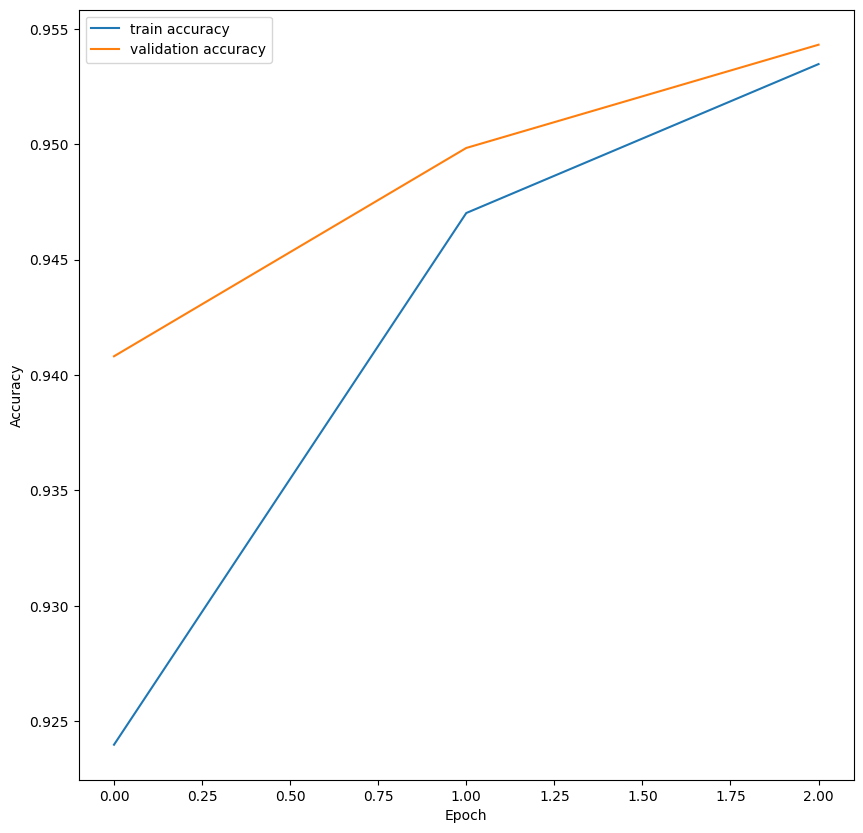

{'loss': [0.19520914554595947, 0.14114141464233398, 0.12562377750873566],
 'accuracy': [0.9239839315414429, 0.9470232129096985, 0.9534767866134644],
 'val_loss': [0.1538342535495758, 0.13545763492584229, 0.12507285177707672],
 'val_accuracy': [0.940815806388855, 0.949842095375061, 0.9543157815933228]}

In [7]:
for text in texts:
    print(text)
    text = pad_sequences(tok.texts_to_sequences([text]))
    prediction = model.predict(text, verbose=0)
    print(prediction)
print(history.history['accuracy'])
plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
plt.legend()
plt.show()
history.history